In [1]:
# %matplotlib notebook
%matplotlib inline

import jzap.misc
text = """
Jupyter connect hash:
{word}

To get matching file:
    $> python -c "import jzap.misc; print(jzap.misc.notebook_file('{word}', '/home/jeff/.local/share/jupyter/runtime'))"
To connect to existing notebook:
    $> jupyter console --existing FILE
    
"""
print(text.format(word=jzap.misc.notebook_word()))


Jupyter connect hash:
applying

To get matching file:
    $> python -c "import jzap.misc; print(jzap.misc.notebook_file('applying', '/home/jeff/.local/share/jupyter/runtime'))"
To connect to existing notebook:
    $> jupyter console --existing FILE
    



In [2]:
import jzap
import replay

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy.stats

from pdb import set_trace

import warnings
warnings.filterwarnings('ignore')

path = '/lab/data/behavior_replay_180309.txt'

data = jzap.misc.load_table(path)
print(data.columns)
print(data.head())

Index([u'mouse', u'date', u'behavior', u'behavior_plus', u'behavior_neutral',
       u'behavior_minus', u'hmm_behavior', u'hmm_behavior_plus',
       u'hmm_behavior_neutral', u'hmm_behavior_minus', u'hmm_behavior_pm',
       u'day_sum_eqdist_0_1_plus', u'day_frac_eqdist_0_1_plus',
       u'day_sum_eqdist_0_1_minus', u'day_frac_eqdist_0_1_minus', u'dprime',
       u'hmm_dprime', u'hmm_dprime_noneutral', u'hmm_dprime_run2',
       u'hmm_dprime_run3', u'hmm_dprime_run4', u'hmm_engagement',
       u'training_licks', u'lick_latency', u'running', u'replay_freq_0_1_plus',
       u'replay_freq_0_1_neutral', u'replay_freq_0_1_minus', u'n_stimuli_plus',
       u'n_stimuli_neutral', u'n_stimuli_minus', u'n_ensure', u'ncorrect_plus',
       u'ncorrect_minus', u'ncorrect_neutral', u'nfalse_plus', u'nfalse_minus',
       u'nfalse_neutral', u'hmm_ncorrect_plus', u'hmm_ncorrect_minus',
       u'hmm_ncorrect_neutral', u'hmm_nfalse_plus', u'hmm_nfalse_minus',
       u'hmm_nfalse_neutral', u'hmm_nfalse_a

## How much is the engagement HMM changing the behavior?

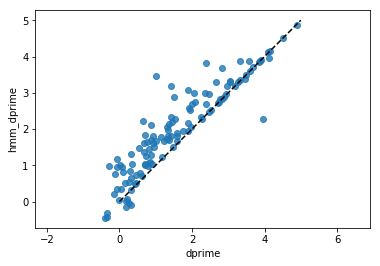

In [3]:
_, ax = plt.subplots()
sns.regplot(ax=ax, x='dprime', y='hmm_dprime', data=data, fit_reg=False)
plt.plot([0, 5], [0, 5], ls='--', color='k')
plt.axis('equal');

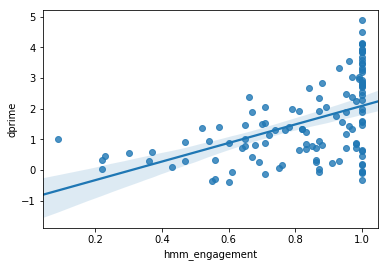

In [4]:
_, ax = plt.subplots()
sns.regplot(ax=ax, y='dprime', x='hmm_engagement', data=data)

## Relationship between individual task performance and dprime
### Results:
- Overall performance most strongly driven by improvements in plus trials
- Relatedly, there is the most variability on plus trials

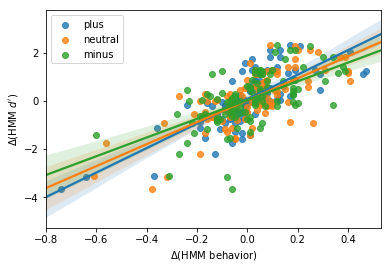

In [5]:
_, ax = plt.subplots()
sns.regplot(
    y='d_hmm_dprime_prev', x='d_hmm_behav_plus_prev', data=data, ax=ax,
    label='plus')
sns.regplot(
    y='d_hmm_dprime_prev', x='d_hmm_behav_neutral_prev', data=data, ax=ax,
    label='neutral')
sns.regplot(
    y='d_hmm_dprime_prev', x='d_hmm_behav_minus_prev', data=data, ax=ax,
    label='minus')
ax.set_ylabel(r"$\Delta$(HMM $d'$)")
ax.set_xlabel(r"$\Delta$(HMM behavior)")
ax.legend()

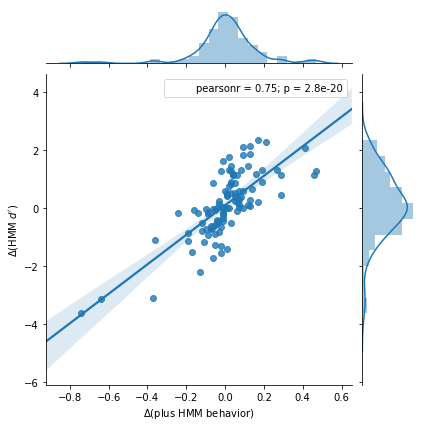

In [6]:
sns.jointplot(
    y='d_hmm_dprime_prev', x='d_hmm_behav_plus_prev', data=data, kind='reg')
plt.ylabel(r"$\Delta$(HMM $d'$)")
plt.xlabel(r"$\Delta$(plus HMM behavior)");

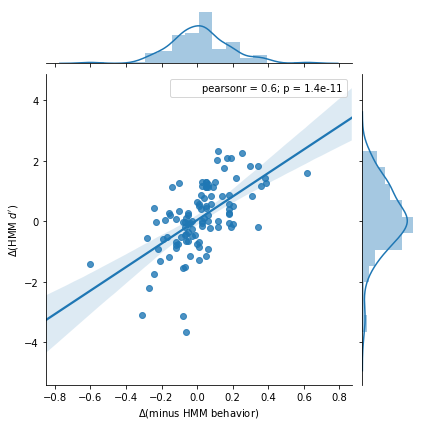

In [7]:
sns.jointplot(
    y='d_hmm_dprime_prev', x='d_hmm_behav_minus_prev', data=data, kind='reg')
plt.ylabel(r"$\Delta$(HMM $d'$)")
plt.xlabel(r"$\Delta$(minus HMM behavior)");

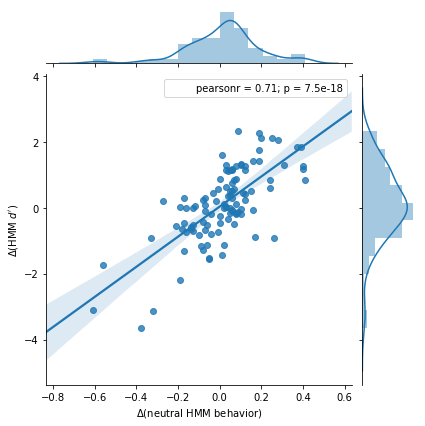

In [8]:
sns.jointplot(
    y='d_hmm_dprime_prev', x='d_hmm_behav_neutral_prev', data=data, kind='reg')
plt.ylabel(r"$\Delta$(HMM $d'$)")
plt.xlabel(r"$\Delta$(neutral HMM behavior)");

## Relationship between (FAs and Misses) and engagement
### Results
- Once engagement is regressed out, FA and miss rate are very highly correlated

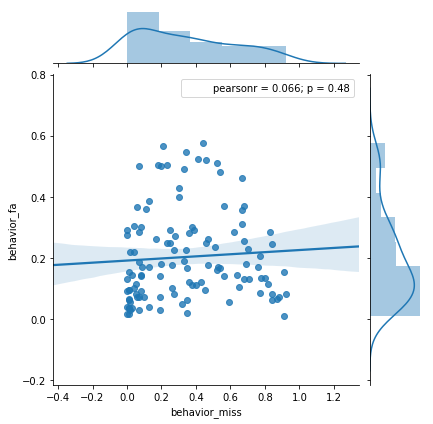

In [9]:
sns.jointplot(x='behavior_miss', y='behavior_fa', data=data, kind='reg')

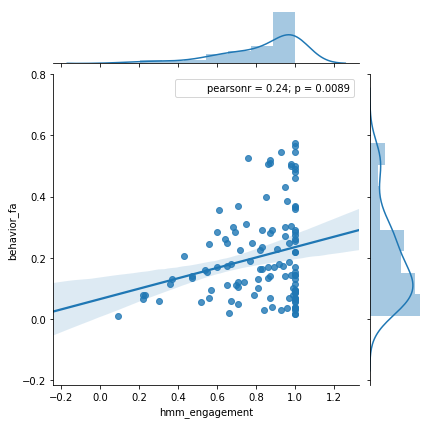

In [10]:
sns.jointplot(x='hmm_engagement', y='behavior_fa', data=data, kind='reg')

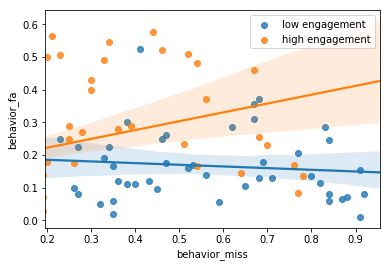

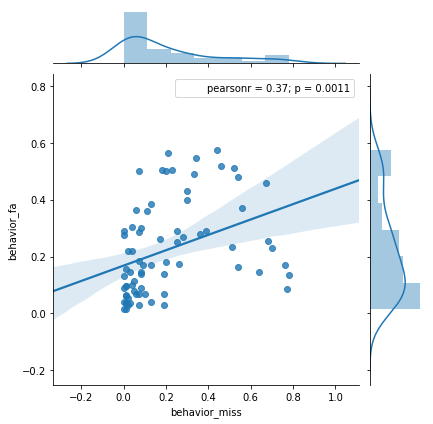

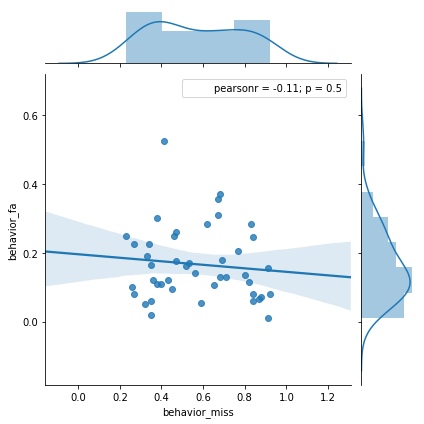

In [11]:
mean_engage = data['hmm_engagement'].mean()
_, ax = plt.subplots()
sns.regplot(x='behavior_miss', y='behavior_fa',
            data=data[data['hmm_engagement'] < mean_engage], ax=ax,
            label='low engagement')
sns.regplot(x='behavior_miss', y='behavior_fa',
            data=data[data['hmm_engagement'] >= mean_engage], ax=ax,
            label='high engagement')
ax.legend()
sns.jointplot(
    x='behavior_miss', y='behavior_fa',
    data=data[data['hmm_engagement'] > mean_engage], kind='reg')
sns.jointplot(
    x='behavior_miss', y='behavior_fa',
    data=data[data['hmm_engagement'] < mean_engage], kind='reg')

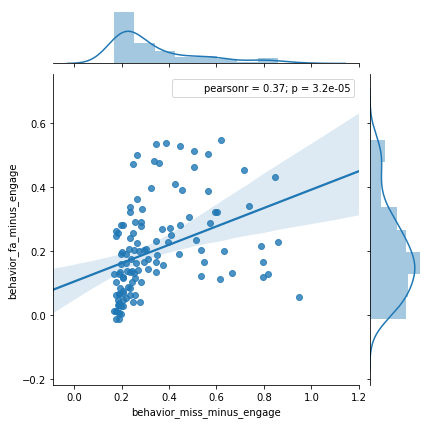

In [12]:
data_sub = data[['behavior_miss', 'hmm_engagement', 'behavior_fa']]
data_sub.dropna(inplace=True)

data_sub = data_sub.assign(
    behavior_miss_minus_engage=jzap.analysis.regress_out(
        data_sub.behavior_miss, data_sub.hmm_engagement),
    behavior_fa_minus_engage=jzap.analysis.regress_out(
        data_sub.behavior_fa, data_sub.hmm_engagement))

sns.jointplot(
    x='behavior_miss_minus_engage', y='behavior_fa_minus_engage', data=data_sub,
    kind='reg')

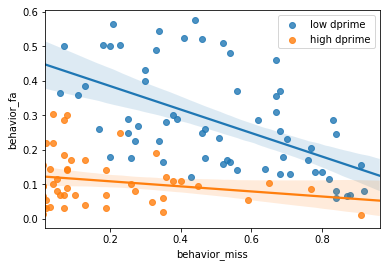

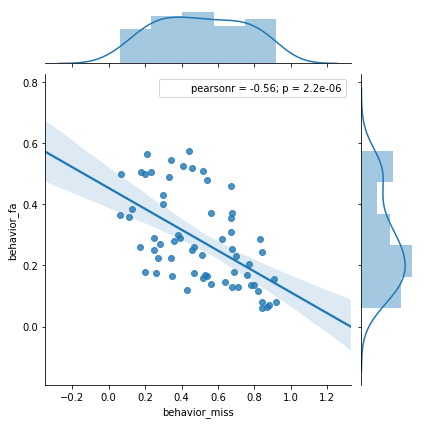

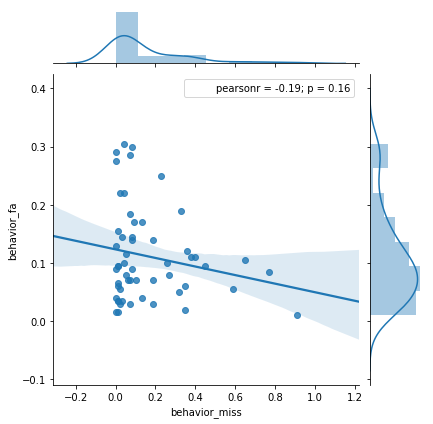

In [13]:
mean_dprime = data['hmm_dprime'].mean()
_, ax = plt.subplots()
sns.regplot(x='behavior_miss', y='behavior_fa',
            data=data[data['hmm_dprime'] < mean_dprime], ax=ax,
            label='low dprime')
sns.regplot(x='behavior_miss', y='behavior_fa',
            data=data[data['hmm_dprime'] >= mean_dprime], ax=ax,
            label='high dprime')
ax.legend()
sns.jointplot(
    x='behavior_miss', y='behavior_fa',
    data=data[data['hmm_dprime'] < mean_dprime], kind='reg')
sns.jointplot(
    x='behavior_miss', y='behavior_fa',
    data=data[data['hmm_dprime'] >= mean_dprime], kind='reg')

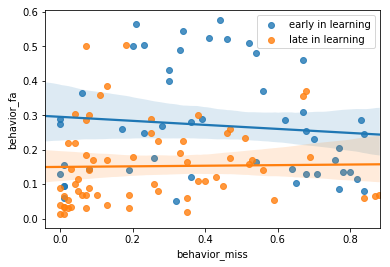

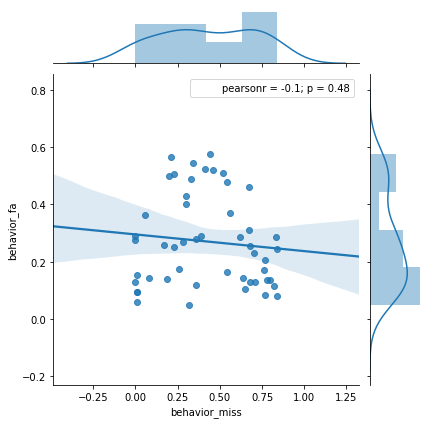

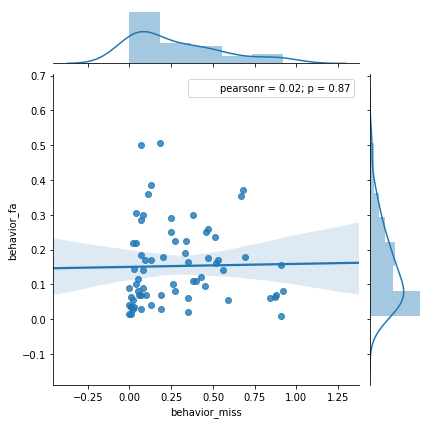

In [14]:
mean_day = data['day_in_phase'].median()
_, ax = plt.subplots()
sns.regplot(x='behavior_miss', y='behavior_fa',
            data=data[data['day_in_phase'] < mean_day], ax=ax,
            label='early in learning')
sns.regplot(x='behavior_miss', y='behavior_fa',
            data=data[data['day_in_phase'] >= mean_day], ax=ax,
            label='late in learning')
ax.legend()
sns.jointplot(
    x='behavior_miss', y='behavior_fa',
    data=data[data['day_in_phase'] < mean_day], kind='reg')
sns.jointplot(
    x='behavior_miss', y='behavior_fa',
    data=data[data['day_in_phase'] >= mean_day], kind='reg')

### FA and misses over time

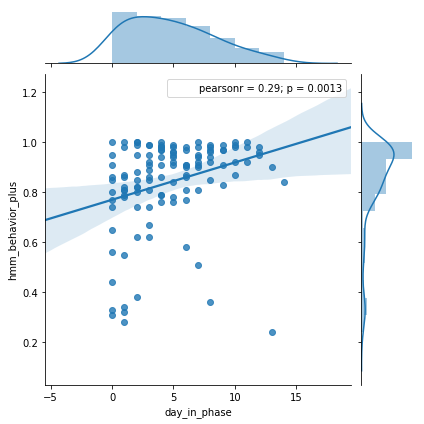

In [15]:
sns.jointplot(
    y='hmm_behavior_plus', x='day_in_phase', data=data, kind='reg')

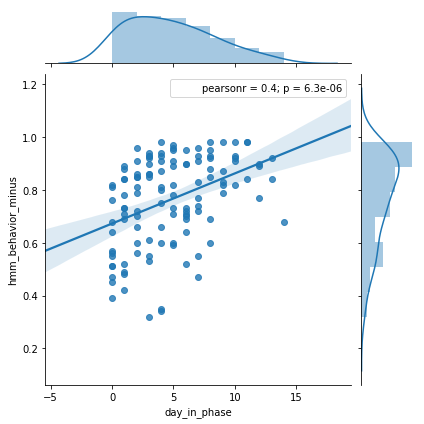

In [16]:
sns.jointplot(
    y='hmm_behavior_minus', x='day_in_phase', data=data, kind='reg')

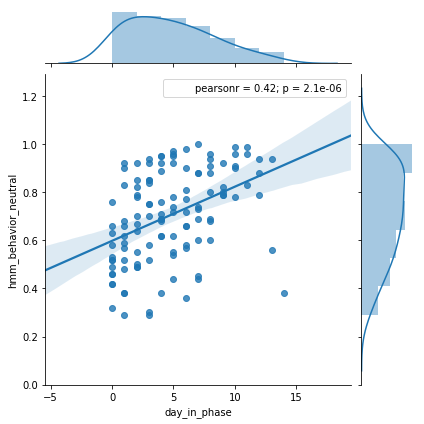

In [17]:
sns.jointplot(
    y='hmm_behavior_neutral', x='day_in_phase', data=data, kind='reg')

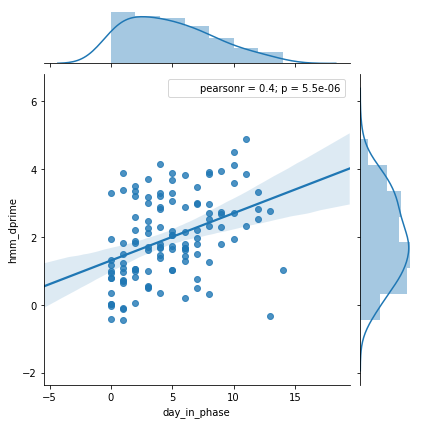

In [18]:
sns.jointplot(
    y='hmm_dprime', x='day_in_phase', data=data, kind='reg')

## Data distributions

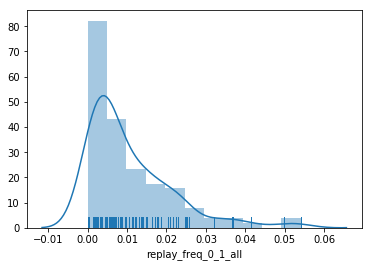

In [21]:
_, ax = plt.subplots()
sns.distplot(data.replay_freq_0_1_all.dropna(), rug=True, ax=ax)

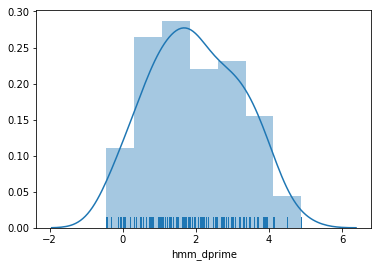

In [22]:
_, ax = plt.subplots()
sns.distplot(data.hmm_dprime.dropna(), rug=True, ax=ax)

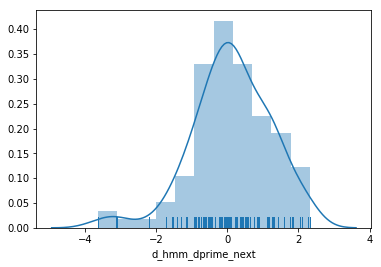

In [23]:
_, ax = plt.subplots()
sns.distplot(data.d_hmm_dprime_next.dropna(), rug=True, ax=ax)

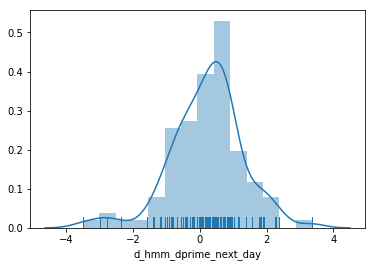

In [24]:
_, ax = plt.subplots()
sns.distplot(data.d_hmm_dprime_next_day.dropna(), rug=True, ax=ax)

# d_dprime and d_prime

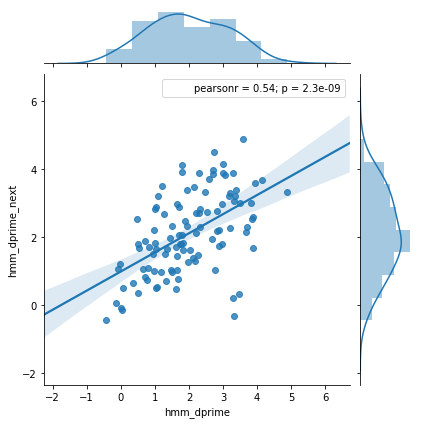

In [25]:
sns.jointplot(
    x='hmm_dprime', y='hmm_dprime_next', data=data, kind='reg')

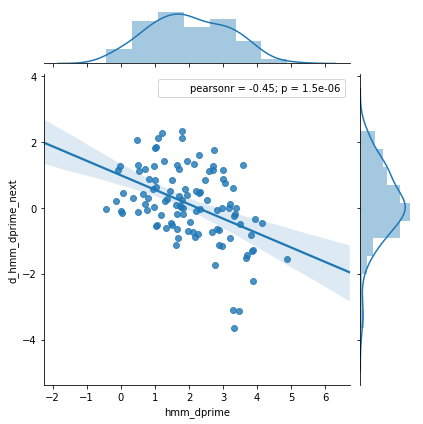

In [26]:
sns.jointplot(
    x='hmm_dprime', y='d_hmm_dprime_next', data=data, kind='reg')

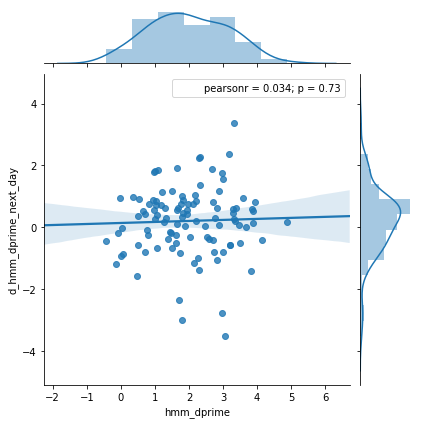

In [27]:
sns.jointplot(
    x='hmm_dprime', y='d_hmm_dprime_next_day', data=data, kind='reg')

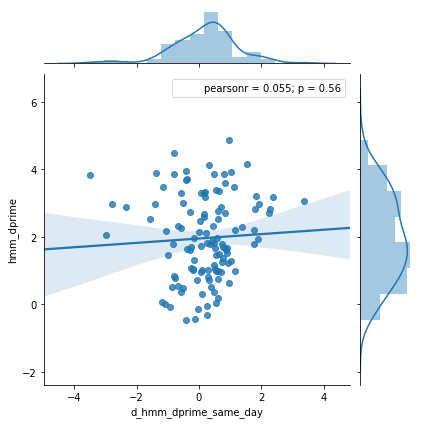

In [28]:
sns.jointplot(
    x='d_hmm_dprime_same_day', y='hmm_dprime', data=data, kind='reg')

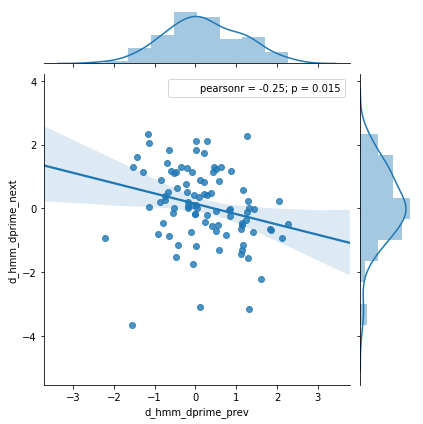

In [29]:
sns.jointplot(
    x='d_hmm_dprime_prev', y='d_hmm_dprime_next', data=data, kind='reg')

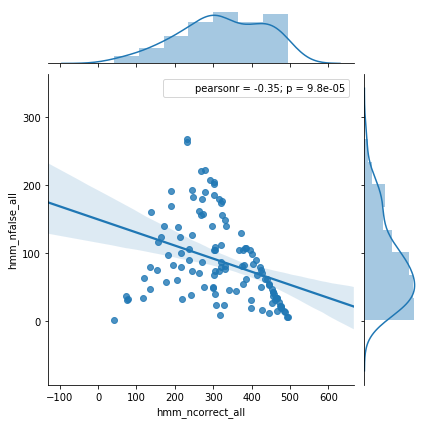

In [30]:
sns.jointplot(
    x='hmm_ncorrect_all', y='hmm_nfalse_all', data=data, kind='reg')

In [31]:
data.columns

Index([u'mouse', u'date', u'behavior', u'behavior_plus', u'behavior_neutral',
       u'behavior_minus', u'hmm_behavior', u'hmm_behavior_plus',
       u'hmm_behavior_neutral', u'hmm_behavior_minus', u'hmm_behavior_pm',
       u'day_sum_eqdist_0_1_plus', u'day_frac_eqdist_0_1_plus',
       u'day_sum_eqdist_0_1_minus', u'day_frac_eqdist_0_1_minus', u'dprime',
       u'hmm_dprime', u'hmm_dprime_noneutral', u'hmm_dprime_run2',
       u'hmm_dprime_run3', u'hmm_dprime_run4', u'hmm_engagement',
       u'training_licks', u'lick_latency', u'running', u'replay_freq_0_1_plus',
       u'replay_freq_0_1_neutral', u'replay_freq_0_1_minus', u'n_stimuli_plus',
       u'n_stimuli_neutral', u'n_stimuli_minus', u'n_ensure', u'ncorrect_plus',
       u'ncorrect_minus', u'ncorrect_neutral', u'nfalse_plus', u'nfalse_minus',
       u'nfalse_neutral', u'hmm_ncorrect_plus', u'hmm_ncorrect_minus',
       u'hmm_ncorrect_neutral', u'hmm_nfalse_plus', u'hmm_nfalse_minus',
       u'hmm_nfalse_neutral', u'hmm_nfalse_a